In [1]:
'''
experiment - Semi-Converging EM
'''
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import agent
import chain as fl
import utils

# pretify
sns.set_style('whitegrid')

In [2]:
'''
experiment setting
'''
# parameters
len_episodes = 100
num_episodes = 20
num_states = 5
num_actions = 2
discount = 1
num_experiments = 200
# reward = r(s,a) = n(s) x n(a) matrix
# expected reward - as reward is also stochastic)
reward = np.array([[0, 2],
                   [0, 2],
                   [0, 2],
                   [0, 2],
                   [10, 2]])
# start_dist (always starts in state 0)
start_dist = np.array([1, 0, 0, 0, 0])

4.4
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
4.24
[[0.28 1.   1.   1.   1.  ]
 [0.72 0.   0.   0.   0.  ]]
4.42
[[0.98 1.   1.   1.   1.  ]
 [0.02 0.   0.   0.   0.  ]]
3.66
[[0.95 1.   1.   1.   1.  ]
 [0.05 0.   0.   0.   0.  ]]
4.12
[[0.88 1.   1.   1.   1.  ]
 [0.12 0.   0.   0.   0.  ]]
4.9
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
3.4
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
4.1
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
3.9
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
2.88
[[0.92 1.   1.   1.   1.  ]
 [0.08 0.   0.   0.   0.  ]]
1.98
[[0.   0.74 1.   0.   1.  ]
 [1.   0.26 0.   1.   0.  ]]
2.9
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
1.98
[[0.   0.   0.92 0.   1.  ]
 [1.   1.   0.08 1.   0.  ]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
5.6
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
4.6
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
1.98
[[0.   0.   0.57 0.   1.  ]
 [1.   1.   0.43 1.   0.  ]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
2.52
[[0.98 1.

3.7
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
3.18
[[0.07 1.   1.   1.   1.  ]
 [0.93 0.   0.   0.   0.  ]]
5.32
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
3.1
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
3.9
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
3.5
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
5.36
[[0.81 1.   1.   1.   1.  ]
 [0.19 0.   0.   0.   0.  ]]
2.4
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
2.7
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
2.94
[[0.   0.95 1.   0.   1.  ]
 [1.   0.05 0.   1.   0.  ]]
2.0
[[0.   0.   0.13 0.   1.  ]
 [1.   1.   0.87 1.   0.  ]]
5.4
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
4.4
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
3.6
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
5.7
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
3.1
[[0.99 1.   1.   1.   1.  ]
 [0.01 0.   0.   0.   0.  ]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
2.8
[[0.   0.   0.01 0.   1.  ]
 [1.   1.   0.99 1.   0.  ]

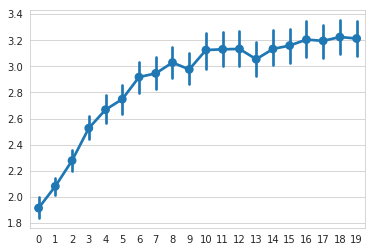

In [3]:
'''
Semi-Converging EM
'''
reward_data = []
for _ in tqdm(range(num_experiments)):
    # make agent bond
    bond = agent.MLEM(num_actions,
                      num_states,
                      discount,
                      len_episodes)
    bond.reward = np.copy(reward)
    bond.start_dist = np.copy(start_dist)

    # for every episode
    avg_reward_history = []
    for _ in range(num_episodes):
        # reset total reward per episode count
        total_reward = 0
        bond.reset()
        game = fl.make_game()
        obs = game.its_showtime()
        for _ in range(len_episodes):
            action = bond.play(utils.get_location(obs, char='O'))
            obs = game.play(action)
            if not obs[1] is None:
                total_reward += obs[1]
            # learn after each time step
            bond.learn(niter=1)
        # add average reward to list
        avg_reward_history.append(total_reward/len_episodes)
        # quit game
        game.play(5)
    reward_data.append(avg_reward_history)
    print(avg_reward_history[-1])
    print(np.round(bond.policy, 2))

semi_reward_data = np.array(reward_data)
# plot rewards
sns.pointplot(data=semi_reward_data, ci=90)
plt.show()

2.52
[[0.06 0.87 1.   1.   1.  ]
 [0.94 0.13 0.   0.   0.  ]]
2.76
[[0.21 0.84 1.   1.   1.  ]
 [0.79 0.16 0.   0.   0.  ]]
2.76
[[0.48 0.8  0.94 1.   1.  ]
 [0.52 0.2  0.06 0.   0.  ]]
1.58
[[0.2  0.18 0.21 0.08 1.  ]
 [0.8  0.82 0.79 0.92 0.  ]]
3.46
[[0.39 0.78 0.92 1.   1.  ]
 [0.61 0.22 0.08 0.   0.  ]]
3.38
[[0.55 0.82 0.99 1.   1.  ]
 [0.45 0.18 0.01 0.   0.  ]]
2.22
[[0.18 0.81 0.98 1.   1.  ]
 [0.82 0.19 0.02 0.   0.  ]]
3.58
[[0.35 0.81 0.97 0.97 1.  ]
 [0.65 0.19 0.03 0.03 0.  ]]
4.86
[[0.35 0.82 0.97 1.   1.  ]
 [0.65 0.18 0.03 0.   0.  ]]
1.92
[[0.11 0.18 0.69 0.   1.  ]
 [0.89 0.82 0.31 1.   0.  ]]
2.84
[[0.21 0.81 0.99 1.   1.  ]
 [0.79 0.19 0.01 0.   0.  ]]
3.96
[[0.18 0.83 1.   0.95 1.  ]
 [0.82 0.17 0.   0.05 0.  ]]
3.14
[[0.08 0.81 1.   1.   1.  ]
 [0.92 0.19 0.   0.   0.  ]]
2.66
[[0.1  0.82 1.   1.   1.  ]
 [0.9  0.18 0.   0.   0.  ]]
3.24
[[0.27 0.84 0.96 1.   1.  ]
 [0.73 0.16 0.04 0.   0.  ]]
3.66
[[0.39 0.82 0.99 0.99 1.  ]
 [0.61 0.18 0.01 0.01 0.  ]]
4.38
[[0

3.46
[[0.02 0.81 1.   1.   1.  ]
 [0.98 0.19 0.   0.   0.  ]]
1.94
[[0.15 0.19 0.19 0.07 1.  ]
 [0.85 0.81 0.81 0.93 0.  ]]
2.0
[[0.45 0.77 0.93 1.   1.  ]
 [0.55 0.23 0.07 0.   0.  ]]
3.76
[[0.64 0.82 0.98 1.   1.  ]
 [0.36 0.18 0.02 0.   0.  ]]
4.9
[[0.49 0.78 0.97 1.   1.  ]
 [0.51 0.22 0.03 0.   0.  ]]
2.38
[[0.36 0.79 0.97 1.   1.  ]
 [0.64 0.21 0.03 0.   0.  ]]
3.36
[[0.34 0.81 0.99 1.   1.  ]
 [0.66 0.19 0.01 0.   0.  ]]
2.56
[[0.58 0.76 0.98 1.   1.  ]
 [0.42 0.24 0.02 0.   0.  ]]
3.72
[[0.31 0.81 1.   1.   1.  ]
 [0.69 0.19 0.   0.   0.  ]]
4.38
[[0.13 0.81 1.   0.99 1.  ]
 [0.87 0.19 0.   0.01 0.  ]]
3.9
[[0.16 0.84 0.98 1.   1.  ]
 [0.84 0.16 0.02 0.   0.  ]]
3.36
[[0.34 0.8  0.98 0.99 1.  ]
 [0.66 0.2  0.02 0.01 0.  ]]
1.84
[[0.06 0.1  0.14 0.93 1.  ]
 [0.94 0.9  0.86 0.07 0.  ]]
1.54
[[0.13 0.82 1.   1.   1.  ]
 [0.87 0.18 0.   0.   0.  ]]
1.58
[[0.2  0.37 0.78 0.01 1.  ]
 [0.8  0.63 0.22 0.99 0.  ]]
3.68
[[0.15 0.8  1.   1.   1.  ]
 [0.85 0.2  0.   0.   0.  ]]
3.08
[[0.03

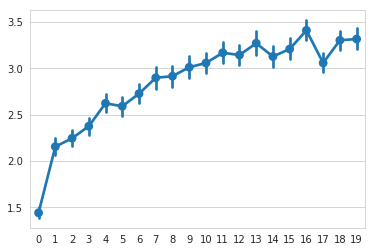

In [4]:
'''
Fully-Converging EM
'''
reward_data=[]
for _ in tqdm(range(num_experiments)):
    # make agent bond
    bond = agent.MLEM(num_actions,
                      num_states,
                      discount,
                      len_episodes)
    bond.reward = np.copy(reward)
    bond.start_dist = np.copy(start_dist)

    # for every episode
    avg_reward_history = []
    for _ in range(num_episodes):
        # reset total reward per episode count
        total_reward = 0
        bond.reset()
        game = fl.make_game()
        obs = game.its_showtime()
        for _ in range(len_episodes):
            action = bond.play(utils.get_location(obs, char='O'))
            obs = game.play(action)
            if not obs[1] is None:
                total_reward += obs[1]
        # learn after the end of episode
        bond.learn(nconv=0.01)
        # add average reward to list
        avg_reward_history.append(total_reward/len_episodes)
        # quit game
        game.play(5)
    reward_data.append(avg_reward_history)
    print(avg_reward_history[-1])
    print(np.round(bond.policy, 2))

full_reward_data = np.array(reward_data)
# plot rewards
sns.pointplot(data=full_reward_data, ci=90)
plt.show()

In [8]:
'''
a dumb hack to prepare data for plotting
'''
log = pd.DataFrame(columns=['episode',
                           'average-reward/time-step',
                           'algorithm'])
for nx in range(num_experiments):
    for ne in range(num_episodes):
        log=log.append(pd.DataFrame({'episode': ne+1,
                                    'average-reward/time-step': full_reward_data[nx, ne],
                                    'algorithm': "ML-EM"}, index=[log.size+1]))
for nx in range(num_experiments):
    for ne in range(num_episodes):
        log=log.append(pd.DataFrame({'episode': ne+1,
                                    'average-reward/time-step': semi_reward_data[nx, ne],
                                    'algorithm': "Semi-EM"}, index=[log.size+1]))

In [9]:
'''
save the reward values
'''
log.to_pickle("exp_sm.pkl")

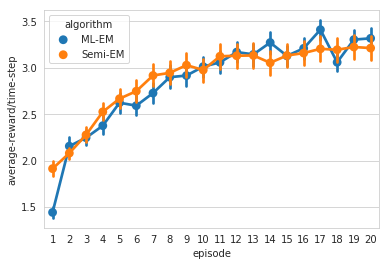

In [10]:
'''
code for plotting a good graph
'''
sns.pointplot(x="episode",
              y="average-reward/time-step",
              hue="algorithm",
              data=log,
              ci=90)
plt.savefig('exp_sm_result.png', dpi=600, bbox_inches="tight")